In [150]:
##Image_captioning_model 

In [1]:
train=open('Flickr8k_text/Flickr8k.lemma.token.txt','r')
r=train.readlines()
print(len(r))
train.close()

40460


In [2]:
r

["1305564994_00513f9a5b.jpg#0\tA man in street racer armor be examine the tire of another racer 's motorbike .\n",
 '1305564994_00513f9a5b.jpg#1\tTwo racer drive a white bike down a road .\n',
 '1305564994_00513f9a5b.jpg#2\tTwo motorist be ride along on their vehicle that be oddly design and color .\n',
 '1305564994_00513f9a5b.jpg#3\tTwo person be in a small race car drive by a green hill .\n',
 '1305564994_00513f9a5b.jpg#4\tTwo person in race uniform in a street car .\n',
 '1351764581_4d4fb1b40f.jpg#0\tA firefighter extinguish a fire under the hood of a car .\n',
 '1351764581_4d4fb1b40f.jpg#1\ta fireman spray water into the hood of small white car on a jack\n',
 '1351764581_4d4fb1b40f.jpg#2\tA fireman spray inside the open hood of small white car , on a jack .\n',
 '1351764581_4d4fb1b40f.jpg#3\tA fireman use a firehose on a car engine that be up on a carjack .\n',
 '1351764581_4d4fb1b40f.jpg#4\tFirefighter use water to extinguish a car that be on fire .\n',
 '1358089136_976e3d2e30.jpg

In [4]:
token_dict={}
for line in r:
    k = line.split('#')
    key=k[0]
    value=k[1]
    
    if token_dict.get(key) is None:
        token_dict[key]=[]
        token_dict[key].append('<start> ' + value[2:-1] + ' <end>')
    else:
        
        token_dict[key].append('<start> ' + value[2:-1] + ' <end>')
    #token_dict[k] = v
    
    

In [5]:
token_dict

{'1305564994_00513f9a5b.jpg': ["<start> A man in street racer armor be examine the tire of another racer 's motorbike . <end>",
  '<start> Two racer drive a white bike down a road . <end>',
  '<start> Two motorist be ride along on their vehicle that be oddly design and color . <end>',
  '<start> Two person be in a small race car drive by a green hill . <end>',
  '<start> Two person in race uniform in a street car . <end>'],
 '1351764581_4d4fb1b40f.jpg': ['<start> A firefighter extinguish a fire under the hood of a car . <end>',
  '<start> a fireman spray water into the hood of small white car on a jack <end>',
  '<start> A fireman spray inside the open hood of small white car , on a jack . <end>',
  '<start> A fireman use a firehose on a car engine that be up on a carjack . <end>',
  '<start> Firefighter use water to extinguish a car that be on fire . <end>'],
 '1358089136_976e3d2e30.jpg': ['<start> A boy sand surf down a hill <end>',
  '<start> A man be attempt to surf down a hill mak

In [6]:
train=open('Flickr8k_text/Flickr_8k.trainImages.txt','r')
images=train.read().split('\n')
print(len(images))
train.close()

6001


In [7]:
test=open('Flickr8k_text/Flickr_8k.testImages.txt','r')
test_images=test.read().split('\n')
print(len(test_images))
test.close()

1001


In [8]:
val=open('Flickr8k_text/Flickr_8k.devImages.txt','r')
val_images=val.read().split('\n')
print(len(val_images))
val.close()

1001


In [9]:
training_file=open('training_file.txt','w')


In [10]:
test_file=open('test_file.txt','w')
val_file=open('val_file.txt','w')

In [11]:
for ix in images:
    
    if token_dict.get(ix):
        for cap in token_dict[ix]:
            training_file.write(ix + '\t' + cap + '\n')
            
    else:
        training_file.write('')
        
training_file.close()
    

In [12]:
for ix in test_images:
    
    if token_dict.get(ix):
        for cap in token_dict[ix]:
            test_file.write(ix + '\t' + cap + '\n')
            
    else:
        test_file.write('')
        
test_file.close()

In [13]:
for ix in val_images:
    
    if token_dict.get(ix):
        for cap in token_dict[ix]:
            val_file.write(ix + '\t' + cap + '\n')
            
    else:
        val_file.write('')
        
val_file.close()

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import Model,Sequential
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image

Using TensorFlow backend.


In [14]:
def preprocessimage(path):
    
    temp_img=image.load_img(path,target_size=(224,224,3))
    temp_img=image.img_to_array(temp_img)
    
    
    
    temp_img = np.expand_dims(temp_img, axis=0)
    return temp_img

In [15]:
res_model=ResNet50(include_top=False,weights='imagenet',input_shape=(224,224,3),pooling='avg')
res_model.summary()

W0831 20:54:53.265618 12852 deprecation_wrapper.py:119] From c:\users\sachin\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0831 20:54:53.964303 12852 deprecation_wrapper.py:119] From c:\users\sachin\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0831 20:54:54.292834 12852 deprecation_wrapper.py:119] From c:\users\sachin\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W0831 20:54:54.523642 12852 deprecation_wrapper.py:119] From c:\users\sachin\appdata\local\programs\python\python36\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_se

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [24]:
pred_dict={}
count=0
for ix in images:
    if ix == "":
        continue
    if count >= 3000:
        break
    count+=1
    if count%500==0:
        print(count)
    
    img_path='Flickr8k_Dataset/Flicker8k_Dataset/'+ix
    p=preprocessimage(img_path)
    
    pred=res_model.predict(p).reshape(2048,)
    pred_dict[ix]=pred
    

KeyboardInterrupt: 

In [ ]:
pred_dict

In [ ]:
dictionary=pred_dict

In [16]:
import pickle

In [ ]:

with open( "embedded_images_trained4.p", "wb" ) as pickle_f:
    pickle.dump(pred_dict, pickle_f,protocol=pickle.HIGHEST_PROTOCOL)

In [17]:
with open('embedded_images_trained4.p', 'rb') as handle:
    b = pickle.load(handle)

In [18]:
b

{'2513260012_03d33305cf.jpg': array([0.30808365, 0.81291395, 0.28417167, ..., 0.25810212, 0.        ,
        0.21858208], dtype=float32),
 '2903617548_d3e38d7f88.jpg': array([0.0345852 , 0.6185327 , 0.00202744, ..., 0.        , 0.05280421,
        0.6530711 ], dtype=float32),
 '3338291921_fe7ae0c8f8.jpg': array([1.6495904e+00, 1.4456939e+00, 2.5787647e-04, ..., 0.0000000e+00,
        7.2089774e-03, 1.8084382e-01], dtype=float32),
 '488416045_1c6d903fe0.jpg': array([0.17116547, 0.8935687 , 0.06174021, ..., 0.06140465, 0.29300502,
        0.28004992], dtype=float32),
 '2644326817_8f45080b87.jpg': array([0.2305133 , 1.529341  , 0.00789345, ..., 0.        , 0.4884672 ,
        0.17311679], dtype=float32),
 '218342358_1755a9cce1.jpg': array([0.77619493, 0.2842742 , 0.50556296, ..., 0.62187123, 0.22369802,
        0.05205467], dtype=float32),
 '2501968935_02f2cd8079.jpg': array([0.5506622 , 2.1922805 , 0.17906258, ..., 0.00408259, 0.3693384 ,
        0.58911276], dtype=float32),
 '269934286

In [ ]:
#trainedemb.close()

In [19]:
train=open('training_file.txt','r')
train_dataset=train.readlines()
train.close()

In [20]:
len(train_dataset)

30000

In [21]:
caption_list=[]
for ix in train_dataset:
    l=ix.split('\t')
    caption_list.append(l[1][:-1])
    
    
    

In [22]:
caption_list

['<start> A black dog be run after a white dog in the snow . <end>',
 '<start> Black dog chase brown dog through snow <end>',
 '<start> Two dog chase each other across the snowy ground . <end>',
 '<start> Two dog play together in the snow . <end>',
 '<start> Two dog run through a low lie body of water . <end>',
 '<start> A little baby play croquet . <end>',
 '<start> A little girl play croquet next to a truck . <end>',
 '<start> A child be play croquette by a truck . <end>',
 '<start> A kid be in front of a car with a put and a ball . <end>',
 '<start> A little boy be play with a croquet hammer and ball beside a car . <end>',
 '<start> A brown dog in the snow have something hot pink in its mouth . <end>',
 '<start> A brown dog in the snow hold a pink hat . <end>',
 '<start> A brown dog be hold a pink shirt in the snow . <end>',
 '<start> A dog be carry something pink in its mouth while walk through the snow . <end>',
 '<start> A dog with something pink in its mouth be look forward . <e

In [23]:
word_list=[]

for capt in caption_list:
    a=capt.split(' ')
    
    word_list.append(a)

    



In [26]:
words=[]
for ix in word_list:
    for j in ix:
        words.append(j)
    

In [27]:
words

['<start>',
 'A',
 'black',
 'dog',
 'be',
 'run',
 'after',
 'a',
 'white',
 'dog',
 'in',
 'the',
 'snow',
 '.',
 '<end>',
 '<start>',
 'Black',
 'dog',
 'chase',
 'brown',
 'dog',
 'through',
 'snow',
 '<end>',
 '<start>',
 'Two',
 'dog',
 'chase',
 'each',
 'other',
 'across',
 'the',
 'snowy',
 'ground',
 '.',
 '<end>',
 '<start>',
 'Two',
 'dog',
 'play',
 'together',
 'in',
 'the',
 'snow',
 '.',
 '<end>',
 '<start>',
 'Two',
 'dog',
 'run',
 'through',
 'a',
 'low',
 'lie',
 'body',
 'of',
 'water',
 '.',
 '<end>',
 '<start>',
 'A',
 'little',
 'baby',
 'play',
 'croquet',
 '.',
 '<end>',
 '<start>',
 'A',
 'little',
 'girl',
 'play',
 'croquet',
 'next',
 'to',
 'a',
 'truck',
 '.',
 '<end>',
 '<start>',
 'A',
 'child',
 'be',
 'play',
 'croquette',
 'by',
 'a',
 'truck',
 '.',
 '<end>',
 '<start>',
 'A',
 'kid',
 'be',
 'in',
 'front',
 'of',
 'a',
 'car',
 'with',
 'a',
 'put',
 'and',
 'a',
 'ball',
 '.',
 '<end>',
 '<start>',
 'A',
 'little',
 'boy',
 'be',
 'play',
 'with

In [28]:
uniq=np.unique(words)
uniq

array(['!', '"', '&', ..., 'zombie', 'zoo', 'zoom'], dtype='<U19')

In [29]:
len(uniq)

6325

In [30]:
forward={key:val for key,val in enumerate(uniq)}
reverse={val:key for key,val in enumerate(uniq)}

In [31]:
len(forward)

6325

In [32]:
forward

{0: '!',
 1: '"',
 2: '&',
 3: "'",
 4: "'n'",
 5: "'s",
 6: "'s-eye-view",
 7: "'slide",
 8: '(',
 9: ')',
 10: ',',
 11: '-',
 12: '-ependent',
 13: '.',
 14: '1',
 15: '10',
 16: '104',
 17: '11',
 18: '12',
 19: '13',
 20: '157',
 21: '17',
 22: '19',
 23: '1950s',
 24: '2',
 25: '21',
 26: '22',
 27: '23',
 28: '25',
 29: '281',
 30: '29',
 31: '3',
 32: '3-wheeler',
 33: '30',
 34: '3rd',
 35: '4',
 36: '4-wheel',
 37: '4-wheeler',
 38: '42',
 39: '4x4',
 40: '5',
 41: '50',
 42: '52',
 43: '57',
 44: '6',
 45: '625',
 46: '661',
 47: '7',
 48: '75',
 49: '8',
 50: '80',
 51: '84',
 52: '97',
 53: ':',
 54: ';',
 55: '<end>',
 56: '<start>',
 57: '?',
 58: 'A',
 59: 'Abarrotes',
 60: 'About',
 61: 'Ac',
 62: 'Ace',
 63: 'Acrobatic',
 64: 'Actor',
 65: 'Ad',
 66: 'Adhd',
 67: 'Adore',
 68: 'Adult',
 69: 'African',
 70: 'African-american',
 71: 'Afro',
 72: 'Aig',
 73: 'Airborne',
 74: 'Ambulance',
 75: 'America',
 76: 'American',
 77: 'Amish',
 78: 'An',
 79: 'And',
 80: 'Animal',

In [33]:
forward[0]='UNK'
forward[6325]='!'
print(forward[6325])
reverse['UNK']=0
reverse['!']= 6325

!


In [34]:
max_len=0 #checking out maximum length for one hot encoding as well as padding
for i in caption_list:
    b=i.split()
    a=len(b)
    if a>max_len:
        max_len=a

In [35]:
max_len

40

In [36]:
from keras.preprocessing import sequence

In [37]:
#creating padding of captions to create uniformity in data
from keras.preprocessing import sequence
padding=[]
next_words_1hot=[]
for ix in caption_list:
    temp_padded=[]
    temp_next=[]
    
    text=ix.split()
    text= [reverse[j] for j in text]
    for i in range(1,len(text)):
        temp_padded.append(text[:i])
        temp_next.append(text[i])
    padded_seq=sequence.pad_sequences(temp_padded,40,padding='post')
    next_word1hot=np.zeros([len(temp_next),len(reverse)], dtype=np.bool)
    for i,next_word in enumerate(temp_next):
        next_word1hot[i,next_word]=1
    padding.append(padded_seq)
    next_words_1hot.append(next_word1hot)

padding=np.array(padding)
next_words_1hot=np.array(next_words_1hot)


print(padding.shape)
print(next_words_1hot.shape)

    

(30000,)
(30000,)


In [36]:
padding[0]

array([[  56,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [  56,   58,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [  56,   58, 1347,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0],
       [  56,   58, 1347, 2263,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,  

In [44]:
no_of_images=2000

In [45]:
captions=np.zeros([0,40])
next_w = np.zeros([0,len(forward)])
for ix in range(no_of_images):
    captions=np.concatenate((captions,padding[ix]))
    next_w=np.concatenate((next_w,next_words_1hot[ix]))



KeyboardInterrupt: 

In [259]:
np.save('captions_i.npy',captions)
np.save('next_word_1hot.npy',next_w)


In [38]:
captions=np.load('captions_i.npy')
next_w=np.load('next_word_1hot.npy')

In [38]:
captions

array([[  56.,    0.,    0., ...,    0.,    0.,    0.],
       [  56.,   58.,    0., ...,    0.,    0.,    0.],
       [  56.,   58., 1347., ...,    0.,    0.,    0.],
       ...,
       [  56.,   58., 6193., ...,    0.,    0.,    0.],
       [  56.,   58., 6193., ...,    0.,    0.,    0.],
       [  56.,   58., 6193., ...,    0.,    0.,    0.]])

In [39]:
captions.shape

(25452, 40)

In [49]:
padding[4].shape[0]


12

In [39]:
image_names=[]
for ix in train_dataset:
    l=ix.split('\t')
    image_names.append(l[0])

In [40]:
image_names

['2513260012_03d33305cf.jpg',
 '2513260012_03d33305cf.jpg',
 '2513260012_03d33305cf.jpg',
 '2513260012_03d33305cf.jpg',
 '2513260012_03d33305cf.jpg',
 '2903617548_d3e38d7f88.jpg',
 '2903617548_d3e38d7f88.jpg',
 '2903617548_d3e38d7f88.jpg',
 '2903617548_d3e38d7f88.jpg',
 '2903617548_d3e38d7f88.jpg',
 '3338291921_fe7ae0c8f8.jpg',
 '3338291921_fe7ae0c8f8.jpg',
 '3338291921_fe7ae0c8f8.jpg',
 '3338291921_fe7ae0c8f8.jpg',
 '3338291921_fe7ae0c8f8.jpg',
 '488416045_1c6d903fe0.jpg',
 '488416045_1c6d903fe0.jpg',
 '488416045_1c6d903fe0.jpg',
 '488416045_1c6d903fe0.jpg',
 '488416045_1c6d903fe0.jpg',
 '2644326817_8f45080b87.jpg',
 '2644326817_8f45080b87.jpg',
 '2644326817_8f45080b87.jpg',
 '2644326817_8f45080b87.jpg',
 '2644326817_8f45080b87.jpg',
 '218342358_1755a9cce1.jpg',
 '218342358_1755a9cce1.jpg',
 '218342358_1755a9cce1.jpg',
 '218342358_1755a9cce1.jpg',
 '218342358_1755a9cce1.jpg',
 '2501968935_02f2cd8079.jpg',
 '2501968935_02f2cd8079.jpg',
 '2501968935_02f2cd8079.jpg',
 '2501968935_02f2cd8

In [41]:
import pickle
with open ('embedded_images_trained4.p','rb') as f:
    embedded_images=pickle.load(f)

In [41]:
embedding_list=[]
for ix in range(len(image_names)):
    if image_names[ix] in embedded_images.keys():
        embedding_list.append(list(embedded_images[image_names[ix]]))

NameError: name 'image_names' is not defined

In [ ]:
embedding_list=np.array(embedding_list)
embedding_list.shape

In [172]:
img_embedding_caption=[]
for ix in range(no_of_images):
    for j in range(padding[ix].shape[0]):
        img_embedding_caption.append(embedding_list[ix])
img_embedding_caption=np.array(img_embedding_caption)

np.save("./image_embedding_caption.npy", img_embedding_caption)

In [175]:
img_embedding_caption.shape

(25452, 2048)

In [173]:
img_name_caption=[]
for ix in range(no_of_images):
    for j in range(padding[ix].shape[0]):
        img_name_caption.append(image_names[ix])
img_name_caption=np.array(img_name_caption)

np.save("./image_name_caption.npy", img_name_caption)

In [189]:
img_name_caption.shape

(25452,)

In [42]:
img_embedding_caption=np.load('image_embedding_caption.npy')

MOdel

In [43]:
from keras.preprocessing import image, sequence
from keras.layers import Dense, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.applications import ResNet50
from keras.utils import plot_model

In [44]:
embedding_size=128
vocab_size=len(forward)
max_len=40

In [45]:
#creating model for image to convert the embedding size in 128 and to apply a repeat vector so that each 
#word of caption can have image embedding
image_model=Sequential()
image_model.add(Dense(128,input_shape=(2048,),activation='relu'))
image_model.add(RepeatVector(max_len))
image_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               262272    
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 40, 128)           0         
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________


In [46]:
#plot_model(image_model,to_file='image_embedding_and_vector.png',show_shapes=True)

##Converting our language one hot into embedding and  passing it to LSTM


In [46]:
language_model=Sequential()
language_model.add(Embedding(input_dim=vocab_size,output_dim=embedding_size,input_length=max_len))
language_model.add(LSTM(256,return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size))) #remember whenever applying another LSTM or
                        #timedistributed layer always keeps the return_sequences of previous layer =True
language_model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 40, 128)           809728    
_________________________________________________________________
lstm_1 (LSTM)                (None, 40, 256)           394240    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 40, 128)           32896     
Total params: 1,236,864
Trainable params: 1,236,864
Non-trainable params: 0
_________________________________________________________________


In [48]:
conc=Concatenate()([image_model.output,language_model.output])
#l=add(Embedding(128))(conc)
l=LSTM(512,return_sequences=True)(conc)
l=LSTM(256)(l)
den=Dense(vocab_size)(l)
out=Activation('softmax')(den)
final_model=Model(input=[image_model.input,language_model.input],output=out)
final_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
embedding_1_input (InputLayer)  (None, 40)           0                                            
__________________________________________________________________________________________________
dense_1_input (InputLayer)      (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 40, 128)      809728      embedding_1_input[0][0]          
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          262272      dense_1_input[0][0]              
__________________________________________________________________________________________________
lstm_1 (LS

c:\users\sachin\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=[<tf.Tenso..., outputs=Tensor("ac...)`
  import sys


In [57]:
final_model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

W0727 14:34:58.141953 19360 deprecation_wrapper.py:119] From c:\users\sachin\appdata\local\programs\python\python36\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



In [58]:
next_w.shape
#print(img_name_caption.shape)

(25452, 6326)

In [109]:
hist=final_modell.fit([img_embedding_caption,captions],next_w,epochs=20,batch_size=512)

Epoch 1/20
25452/25452 [==============================] - 471s 19ms/step - loss: 1.2257 - acc: 0.6236
Epoch 2/20
25452/25452 [==============================] - 364s 14ms/step - loss: 1.2007 - acc: 0.6297
Epoch 3/20
25452/25452 [==============================] - 360s 14ms/step - loss: 1.1759 - acc: 0.6390
Epoch 4/20
25452/25452 [==============================] - 360s 14ms/step - loss: 1.1440 - acc: 0.6457
Epoch 5/20
25452/25452 [==============================] - 358s 14ms/step - loss: 1.1239 - acc: 0.6539
Epoch 6/20
25452/25452 [==============================] - 359s 14ms/step - loss: 1.0952 - acc: 0.6584
Epoch 7/20
25452/25452 [==============================] - 357s 14ms/step - loss: 1.0812 - acc: 0.6610
Epoch 8/20
25452/25452 [==============================] - 355s 14ms/step - loss: 1.0516 - acc: 0.6736
Epoch 9/20
25452/25452 [==============================] - 339s 13ms/step - loss: 1.0285 - acc: 0.6781
Epoch 10/20
25452/25452 [==============================] - 340s 13ms/step - loss: 

In [110]:
final_modell.save('final_model2.h5')


In [47]:
from keras.models import load_model
final_modell = load_model('final_model1.h5')

W0831 20:59:20.498454 12852 deprecation_wrapper.py:119] From c:\users\sachin\appdata\local\programs\python\python36\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0831 20:59:23.055750 12852 deprecation.py:323] From c:\users\sachin\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [48]:
from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
#  the keras model which is trained is defined as 'final_modell' 
model_json = final_modell.to_json()


with open("final_model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
final_modell.save_weights("final_model_weights.h5")

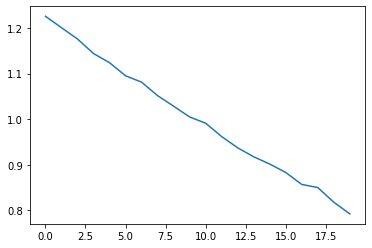

In [120]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])

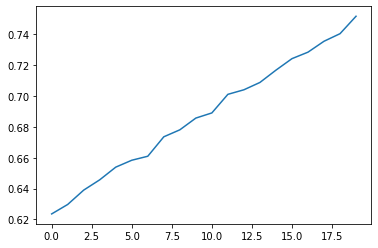

In [121]:
plt.plot(hist.history['acc'])

In [49]:
def getimage(model,image_path):
    p=preprocessimage(image_path)
    pred=model.predict(p).reshape(2048)
    return pred

def predictions(encoded_image):
    starting=['<start>']
    while True:
        #index=index.split()
        index=[reverse[i] for i in starting]
        seq=sequence.pad_sequences([index],maxlen=40,padding='post')
        pred=final_modell.predict([np.array([encoded_image]),np.array(seq)])
        word_pred = forward[np.argmax(pred[0])]
        starting.append(word_pred)
        if word_pred=='<end>' or len(starting)>40:
            
            break
    return ' '.join(starting[1:-1])


    

In [79]:
img_path='test_image4.jpg'
encoded_image=getimage(res_model,img_path)
Cpn= predictions(encoded_image)

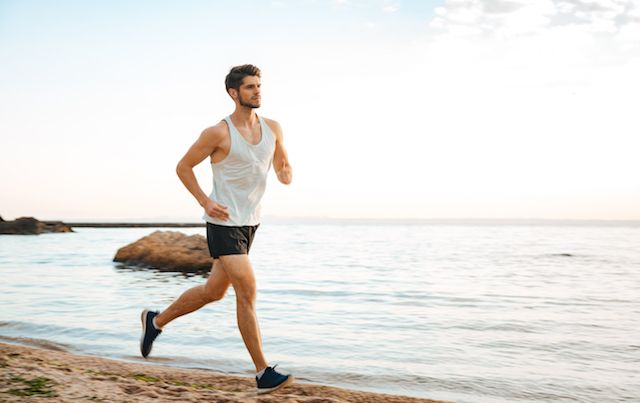

A boy in blue short in short walk on a beach .


In [80]:
from IPython.display import Image, display
z = Image(filename=img_path)
display(z)

print (Cpn)

In [151]:
#......................................Ignore the rest of it..............................................

In [180]:
start_word = ["<start>"]
par_caps = [reverse[i] for i in start_word]

In [183]:
print(par_caps)

[56]


In [35]:
a='this is image captioning project'

In [36]:
s=a.split()

In [37]:
s

['this', 'is', 'image', 'captioning', 'project']

In [64]:
c=[]
for i in range(1,len(s)):
    c.append(s[:i])

In [65]:
print(c)

[array([['this', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]],
      dtype=object), array([['this', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       ['this', 'is', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]],
      dtype=object), array([['this', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       ['this', 'is', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       ['this', 'is', 'image', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]],
      dtype=object)]


In [60]:
from keras.preprocessing import sequence
s=sequence.pad_sequences(c,10,padding='post',dtype='object')

In [61]:
s

array([['this', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       ['this', 'is', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       ['this', 'is', 'image', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       ['this', 'is', 'image', 'captioning', 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0]], dtype=object)

In [77]:
next_words_1hot = np.zeros([len(s), 4000], dtype=np.bool)

In [78]:
next_words_1hot

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [79]:
for i,next_word in enumerate(s):
        next_words_1hot[i, next_word] = 1

IndexError: arrays used as indices must be of integer (or boolean) type